<a href="https://colab.research.google.com/github/solajozsef/git_folder_to_practise/blob/main/cos(x)_approx_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
# feature matrix X
N = 10000
X = [random.uniform(-10, 10) for i in range(N)]
X = np.sort(X).reshape(-1, 1)
X[:3]

array([[-9.99981558],
       [-9.99548051],
       [-9.99448792]])

In [ ]:
# target vector y
y = [np.cos(X[i]) for i in range(N)]
y = np.array(y).reshape(-1, 1)
y[:3]

array([[-0.83917184],
       [-0.84152165],
       [-0.84205745]])

In [ ]:
X.shape

(10000, 1)

In [ ]:
y.shape

(10000, 1)

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
y_scale = min_max_scaler.fit_transform(y)
X_scale.max(),

1.0

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam

In [ ]:
keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape = (1,), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1))

In [ ]:
# compile the keras model
model.compile(loss='mse', optimizer= Adam(), metrics=['accuracy'])


In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=30, batch_size=30)

Epoch 1/30
10000/10000 [==============================] - 1s 149us/step - loss: 0.0011 - acc: 2.0000e-04
Epoch 2/30
10000/10000 [==============================] - 1s 146us/step - loss: 0.0010 - acc: 2.0000e-04
Epoch 3/30
10000/10000 [==============================] - 2s 153us/step - loss: 9.9757e-04 - acc: 2.0000e-04
Epoch 4/30
10000/10000 [==============================] - 1s 150us/step - loss: 0.0012 - acc: 2.0000e-04
Epoch 5/30
10000/10000 [==============================] - 1s 145us/step - loss: 0.0015 - acc: 2.0000e-04
Epoch 6/30
10000/10000 [==============================] - 1s 143us/step - loss: 9.4585e-04 - acc: 2.0000e-04
Epoch 7/30
10000/10000 [==============================] - 1s 147us/step - loss: 9.3171e-04 - acc: 2.0000e-04
Epoch 8/30
10000/10000 [==============================] - 1s 143us/step - loss: 0.0011 - acc: 2.0000e-04
Epoch 9/30
10000/10000 [==============================] - 1s 146us/step - loss: 9.9490e-04 - acc: 2.0000e-04
Epoch 10/30
10000/10000 [==============

In [ ]:
# evaluate the keras model
# no point to evaluate an approximation
#_, accuracy = model.evaluate(X_scale, y_scale)
#print('Accuracy: %.2f' % (accuracy*100))

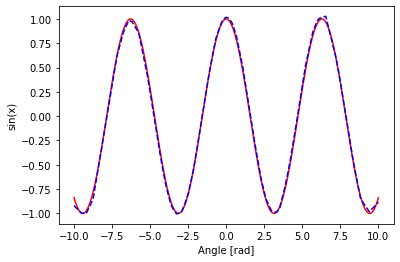

In [ ]:
# plotting the curves
import matplotlib.pylab as plt

pred = model.predict(X)

plt.plot(X, y, 'r-')
plt.plot(X, pred, 'b--')

plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [ ]:
np.sin(-5)


0.9589242746631385

In [ ]:
# check some predictions:
model.predict([-5])

array([[0.9624642]], dtype=float32)

In [ ]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

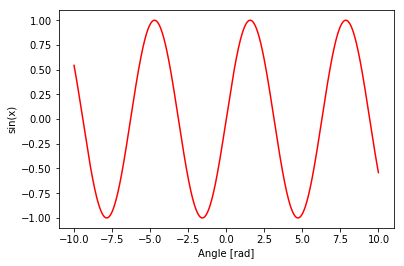

In [ ]:
import matplotlib.pylab as plt

pred = model.predict(X)

plt.plot(X, y, 'r-')
#plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [ ]:
type(pred)

numpy.ndarray

model.predict([22])

N = 5000
X = [random.uniform(-10, 10) for i in range(N)]
X = np.sort(X).reshape(-1, 1)
X[:5]